# Time series extraction for a specific location

This example demonstrates the extraction of time series data for the variable "plant available water"  
from a depth of 13 meters for the year 2023. The data will be extracted for two locations  
Location 1 in Jülich, latitude: 47.60170, longitude: 9.31862  
Location 2 in Amsterdam, latitude 52.37677, longitude: 5.04244  
The time series saved as an ASCII file.

After extracting the time series, the results will be usedto plot the daily plant available water during 2023

First, we need to import all libraries needed in the example.

In [85]:
import os
import sys

cwd = os.getcwd()
tool_path = f"{cwd}/ParFlow_data_extraction_tool"
sys.path.append(tool_path)


In [86]:
import numpy as np
from netCDF4 import Dataset
import datetime
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import data_extraction_tool

First we have to read in some data we can apply the data extraction. For this example we take some of the tool example data provided under  
the data/ directory. In particular, data_input_example_1.json and DE-0055_INDICATOR_regridded_rescaled_SoilGrids250-v2017_BGRvector_newAllv.nc 

In [87]:
data_input = f'{tool_path}/examples/data_input_example_1.json'
lls_indicators = f'{tool_path}/data/DE-0055_INDICATOR_regridded_rescaled_SoilGrids250-v2017_BGRvector_newAllv.nc'

In [88]:
data_extraction_tool.data_extraction_csv(data_input,lls_indicators)

Location: Jülich
Found:
Mapped x index: 644
Mapped y index: 1117
data for Lat:50.93486, Lon:6.394616 is extracted and being written in a CSV file
csv file saved
 
Location: Amsterdam
Found:
Mapped x index: 537
Mapped y index: 1401
The chosen location is located directly on a lake, river or sea, please insert a different location.


A timeseries was extracted for the first location "Jülich" and the results can be seen in Station_Jülich_ADAPTER_DE05_ECMWF-HRES-forecast_FZJ-IBG3-ParFlowCLM380_v04aJuwelsGpuProd_paw_17.0m-depth_20230102-20240101.csv in ../exmaples.

The reason that no time series was extracted for location "Amsterdam", is that the location and the neighbroing grid points fall directly on lake, river or a sea.

After extracting the time series, the results are plotted.


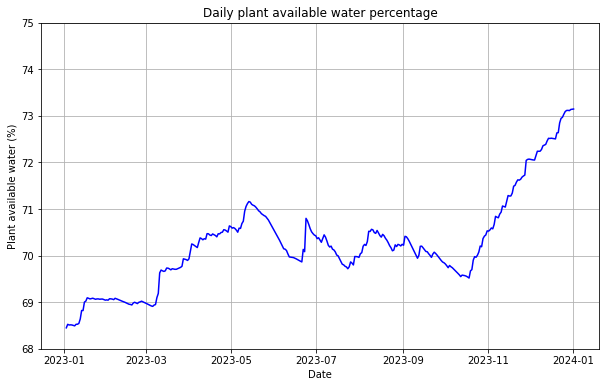

In [89]:
csv_data = f'{cwd}/Station_Jülich_ADAPTER_DE05_ECMWF-HRES-forecast_FZJ-IBG3-ParFlowCLM380_v04aJuwelsGpuProd_paw_17.0m-depth_20230102-20240101.csv'
# Create a Pandas DataFrame from the CSV data
data = pd.read_csv(csv_data, skiprows=9, names=['Date', 'Plant available water'], parse_dates=['Date'])
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Plant available water'], color='b', linestyle='-')
plt.ylim(68,75)
plt.title('Daily plant available water percentage')
plt.xlabel('Date')
plt.ylabel('Plant available water (%)')
plt.grid(True)
plt.show()